In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
import json
import os
import pandas as pd
import numpy as np
import json
import util
import matplotlib.pyplot as plt
import sys
import pickle as pickle


from PIL import Image
from torch.autograd import Variable
from torch import topk
from PIL import Image
import image2vec
from torch.nn import functional as F
from sklearn import svm
from sklearn.metrics import confusion_matrix, r2_score
from docopt import docopt
from pprint import pprint
from os import walk
from sklearn.manifold import TSNE
from os import listdir
from os.path import isfile, join

from svm_classify import predict_test
from test_model import *
from constants import * 
from util import get_splits_csv, get_scores

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
#block loads the SVC output CSV, and the adds scores to the label CSV
results_csv = pd.read_csv("./model_data/output_test_SVC.csv")
predictions = get_scores( results_csv , "./model_data/resampled_train_binary1_full.csv")

Number of images in file:  1963
Size of trueskill data:  19645
Size of unique trueskill data:  13899
1963
Number of images with trueskill:  1963


In [27]:
def merge_and_filter_csvs(df1, df2):
    # Read the first CSV and drop duplicate image_name entries

    df1_unique = df1.drop_duplicates(subset=['image_name'])

    return pd.merge(df2, df1_unique[['image_name', 'city']], on='image_name', how='left')



In [ ]:
#Block reads the labels/score CSV and filters out upsampled repeats
true_df = pd.read_csv("./model_data/resampled_train_binary1_full.csv")
city_pred = merge_and_filter_csvs(true_df , predictions)

In [ ]:
#For the sake of example only load LA values
la_predictions = city_pred[city_pred['city'] == 'la']

Confusion Matrix, resampled_resnet_la
84.71138845553823 % accuracy
98  misclassified out of  641  total images
[[467  53]
 [ 45  76]]
rating
0    0.898077
1    0.628099
Name: image_name, dtype: float64
F1 score:  0.8489674805596876


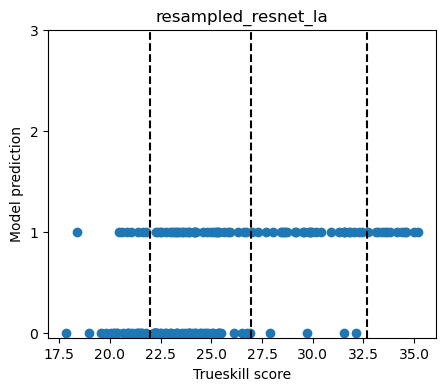

In [30]:
#runs analysis on the LA values with resnet predictions
experiment = "resampled_resnet_la"
fig_results = analyze_results(la_predictions, experiment, "la") 
fig_results

Confusion Matrix, resampled_svm_la
84.71138845553823 % accuracy
98  misclassified out of  641  total images
[[466  54]
 [ 44  77]]
rating
0    0.896154
1    0.636364
Name: image_name, dtype: float64
F1 score:  0.8494051736179479


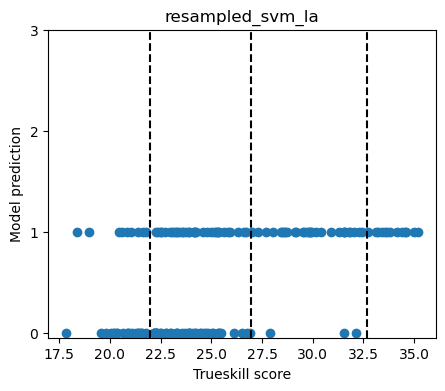

In [31]:
#runs analysis on the LA values with feature extraction SVM predictions
experiment = "resampled_svm_la"
fig_results = analyze_results(la_predictions, experiment, "la", col_pred="pred_svm")
fig_results